In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Linear Models**:
- Linear models make a prediction using a linear function of the input features

    $ ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b $

- $w, b$ (weghts, y-axis offset) are parametters learned by the model. $ŷ$ is the prediction the model makes.

- The output will be more complex to see as number of features increases (dimensionality increases). The
prediction is a line for a single feature, a plane when using two features, or a hyperplane
in higher dimensions (that is, when using more features).

- The difference between different linear models lies in how the model parameters w and b are learned from the training data,
and how model complexity can be controlled.

#### **Linear regression (least squares):**

> Linear regression finds the parameters w and b that minimize
the mean squared error between predictions and the true regression targets, y,
on the training set.

In [2]:
from sklearn.datasets import load_diabetes

diabetes_data = load_diabetes()

In [3]:
print(diabetes_data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
df = pd.DataFrame(diabetes_data['data'], columns=diabetes_data['feature_names'])
df['disease progression'] = diabetes_data.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# instance model
lr = LinearRegression()

# Splitting sets
xtr, xt, ytr, yt = train_test_split(
    diabetes_data.data, diabetes_data.target,
    random_state=42)

# fitting
lr.fit(xtr,ytr)

print(f'Coefficients:\n{lr.coef_}')
print(f'Intercept:\n{lr.intercept_}')

Coefficients:
[  47.74968054 -241.99090728  531.97106288  381.56286182 -918.50290455
  508.25778252  116.95016447  269.4923028   695.80811712   26.32458203]
Intercept:
151.6651755919933


In [6]:
print(f'Training score: {lr.score(xtr, ytr)}')
print(f'Test score: {lr.score(xt, yt)}')

Training score: 0.519034189167905
Test score: 0.4849058889476756


#### **Ridge regression:**

- Same linear equation.
- Magnitude of coefficients can be modified through parametter `alpha: float = 1`. 
    - Modify weights affect how each feature affects the outcome.
    - Higher alpha = more regularization = force coefficients move more to zero.
    - So we can manipulate the regularization. For ridge model is known as L2 regularization.

In [7]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(xtr, ytr)

print(f'Coefficients:\n {ridge.coef_}')
print(f'Socre:\n {ridge.score(xt, yt)}')

Coefficients:
 [  50.55201232  -67.7222237   278.30122846  197.62263845   -6.24583645
  -26.22672623 -151.39433086  120.3233589   215.85446319  101.75577423]
Socre:
 0.43840029731424435


In [8]:
# Adjusting alpha to 10
ridge10 = Ridge(alpha=10).fit(xtr, ytr)
print(f'Coefficients:\n{ridge10.coef_}')
print(f'Socre:\n {ridge10.score(xt, yt)}')

Coefficients:
[ 17.83763181  -2.01927742  60.23960272  45.07216792  13.96326368
  10.03597889 -38.74742127  39.88316246  53.32993877  34.86553873]
Socre:
 0.1564233282092311


In [9]:
# Adjusting alpha to 0.1
ridge01 = Ridge(alpha=0.1).fit(xtr, ytr)
print(f'Coefficients: \n{ridge01.coef_}')
print(f'Socre: \n{ridge01.score(xt, yt)}')

Coefficients: 
[  52.86608707 -200.50867028  493.95917239  339.27983427 -118.0630055
  -80.91079472 -215.28052241  153.41456749  365.68204531   62.42262866]
Socre: 
0.4918270736855388


In [10]:
# Adjusting alpha even smaller
ridge001 = Ridge(alpha=0.01).fit(xtr, ytr)
print(f'Coefficients: \n{ridge001.coef_}')
print(f'Socre: \n{ridge001.score(xt, yt)}')

Coefficients: 
[  50.76062786 -236.23135151  536.04137091  373.82524143 -426.93534002
  127.14987262 -100.43191037  200.10097549  505.46987904   33.91297808]
Socre: 
0.48705852506054104


Note how the magnitude of weigths changes with differents values of `alpha`.

Text(0, 0.5, 'Coefficient magnitude')

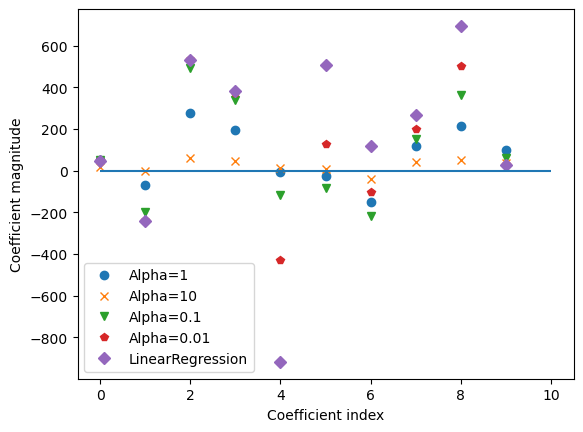

In [11]:
plt.plot(ridge.coef_, 'o', label='Alpha=1')
plt.plot(ridge10.coef_, 'x', label='Alpha=10')
plt.plot(ridge01.coef_, 'v', label='Alpha=0.1')
plt.plot(ridge001.coef_, 'p', label='Alpha=0.01')
plt.plot(lr.coef_, 'D', label='LinearRegression')
plt.legend()
plt.hlines(0, 0, len(lr.coef_))
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')


#### **Lasso regression:**

- Also restricts coefficients to be close to zero.
- Uses L1 regularization.
    - L1 can restrict some coefficients to be exactly zero., which means some features are entirely ignored by the model.

In [12]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(xtr, ytr)

print(f'Coefficients:\n {lasso.coef_}')

print(f'Train set Socre:\n {lasso.score(xtr, ytr)}')
print(f'Socre:\n {lasso.score(xt, yt)}')

Coefficients:
 [  0.          -0.         398.3858307   46.17542123   0.
   0.          -0.           0.         238.18730888   0.        ]
Train set Socre:
 0.34687336241711
Socre:
 0.3791413953419158


In [13]:
lasso01 = Lasso(alpha=0.1, max_iter=100000).fit(xtr, ytr)

print(f'Coefficients:\n {lasso01.coef_}')

print(f'Train set Socre:\n {lasso01.score(xtr, ytr)}')
print(f'Socre:\n {lasso01.score(xt, yt)}')

Coefficients:
 [   0.         -151.41421088  540.86229781  337.22131939  -85.18947609
   -0.         -262.90206877    0.          418.24702559    9.92565297]
Train set Socre:
 0.507826468555518
Socre:
 0.5019753487835406


In [14]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(xtr, ytr)

print(f'Coefficients:\n {lasso001.coef_}')

print(f'train set Socre:\n {lasso001.score(xtr, ytr)}')
print(f'Socre:\n {lasso001.score(xt, yt)}')

Coefficients:
 [  45.31137062 -232.01481078  540.93700206  374.67642676 -484.59053312
  167.27855958  -65.74379326  212.32257707  532.55211564   27.3752437 ]
train set Socre:
 0.5176658929445211
Socre:
 0.4880363435126295


Text(0, 0.5, 'Coefficient magnitude')

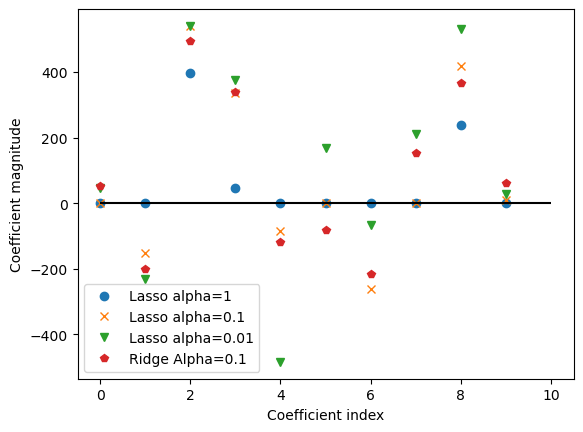

In [15]:
plt.plot(lasso.coef_, 'o', label='Lasso alpha=1')
plt.plot(lasso01.coef_, 'x', label='Lasso alpha=0.1')
plt.plot(lasso001.coef_, 'v', label='Lasso alpha=0.01')
plt.plot(ridge01.coef_, 'p', label='Ridge Alpha=0.1')

plt.legend()
plt.hlines(0, 0, len(lr.coef_), colors='black')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')

Elastic-Net is another linear model. It combines both types of regularization, L1 and L2.

***

## **Linear models for classification:**

- Similar linear formula, but thresholding the predicted value at zero.

    $ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0$

- Result is determined if the function result is smaller or larger than zero. (**-1** or **1** classes)
- The output here is a *Decision boundary*. That means a binary linear classifier separates two classes using a line, a plane or hyperplane (again, depending on the dimensionality, aka number of features.) 

#### **LogisticRegression and LinearSVC**

- Most common linear clasiffiers

- Both use L2 Regularization throug C parametter where high C = *less* regularization.

- Become very powerful in high dimensions

In [16]:
from sklearn.linear_model  import LogisticRegression
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer_data.data, cancer_data.target,
    stratify=cancer_data.target, 
    random_state=66
    )
# using previous training sets for knn
# instance LogisticRegression
logreg = LogisticRegression(max_iter=10000)

# Fitting
logreg.fit(X_train, y_train)

print('Training score: {:.2f}'.format(logreg.score(X_train,y_train)))
print('Training score: {:.2f}'.format(logreg.score(X_test,y_test)))

Training score: 0.98
Training score: 0.94


In [17]:
# Modify C parametter to 100
logreg100 = LogisticRegression(C=100, max_iter=10000)

# Fitting
logreg100.fit(X_train, y_train)

print('Training score: {:.2f}'.format(logreg100.score(X_train,y_train)))
print('Training score: {:.2f}'.format(logreg100.score(X_test,y_test)))

Training score: 0.99
Training score: 0.97


In [18]:
# Modify C parametter to 0.01
logreg001 = LogisticRegression(C=0.01, max_iter=10000)

# Fitting
logreg001.fit(X_train, y_train)

print('Training score: {:.2f}'.format(logreg001.score(X_train,y_train)))
print('Training score: {:.2f}'.format(logreg001.score(X_test,y_test)))

Training score: 0.96
Training score: 0.94


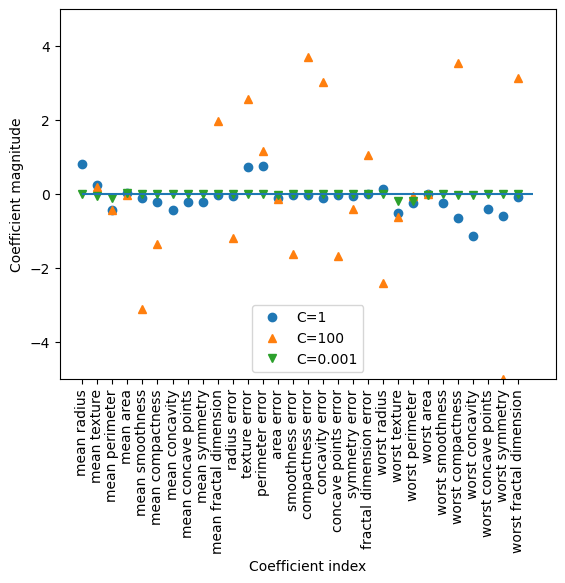

In [19]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer_data.data.shape[1]), cancer_data.feature_names, rotation=90)
plt.hlines(0, 0, cancer_data.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.92
Test accuracy of l1 logreg with C=0.001: 0.90
Training accuracy of l1 logreg with C=1: 0.97
Test accuracy of l1 logreg with C=1: 0.94
Training accuracy of l1 logreg with C=100: 1.00
Test accuracy of l1 logreg with C=100: 0.97


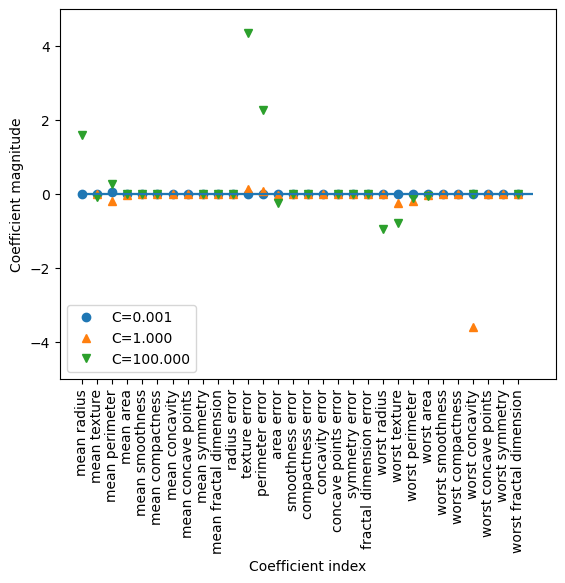

In [20]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver='liblinear', max_iter=10000).fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={}: {:.2f}".format(
    C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={}: {:.2f}".format(
    C, lr_l1.score(X_test, y_test)))

    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    plt.xticks(range(cancer_data.data.shape[1]), cancer_data.feature_names, rotation=90)
    plt.hlines(0, 0, cancer_data.data.shape[1])
    plt.xlabel("Coefficient index")
    plt.ylabel("Coefficient magnitude")
    plt.ylim(-5, 5)
    plt.legend(loc=3)